In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving time_series_2019-ncov-Confirmed.csv to time_series_2019-ncov-Confirmed.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['time_series_2019-ncov-Confirmed.csv']))
# Dataset is now stored in a Pandas Dataframe


In [0]:
col = list(df.columns)
ins = col[1]
col = col[4:]
col.insert(0,ins)

In [0]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [0]:
req = (df.groupby(col[0])[col[0:]].sum())

In [0]:
req.loc[['Netherlands'],['3/22/20']]

,3/22/20
Country/Region,
Netherlands,4216


In [0]:
for i in col[1:]:
  data = list(req[i])
  count = 0
  for j in data:
    if j==0:
      count+=1
  cond = count/len(data)
  if(cond>0.7):
    del req[str(i)]

In [0]:
req.shape

(171, 24)

In [0]:
list(req.loc['China'])

[78928,
 79356,
 79932,
 80136,
 80261,
 80386,
 80537,
 80690,
 80770,
 80823,
 80860,
 80887,
 80921,
 80932,
 80945,
 80977,
 81003,
 81033,
 81058,
 81102,
 81156,
 81250,
 81305,
 81397]

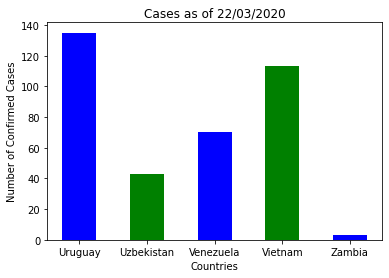

In [0]:
# x-coordinates of countries 
x1 = sorted(list(set(df[col[0]])))[-6:-1]
  
# y-coordinates of number of cases
y1 = list(req['3/22/20'])[-6:-1]
  
# labels for bars 
tick_label =  sorted(list(set(df[col[0]])))[-6:-1]
  
# plotting a bar chart 
plt.bar(x1, y1, tick_label = tick_label, width = 0.5, color = ['blue', 'green']) 
  
# naming the x-axis 
plt.xlabel('Countries') 
# naming the y-axis 
plt.ylabel('Number of Confirmed Cases') 
# plot title 
plt.title('Cases as of 22/03/2020') 
  
# function to show the plot 
plt.show()

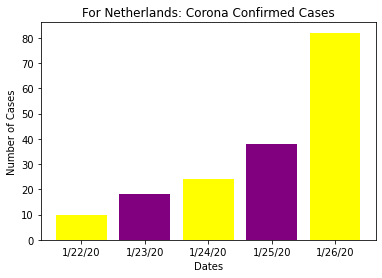

In [0]:
# x-coordinates of date  
x2 = col[1:6]
  
# y-coordinates of cases 
y2 = list(req.loc['Netherlands'])[2:7]
  
# labels for bars 
tick_label = col[1:6] 
  
# plotting a bar chart 
plt.bar(x2, y2, tick_label = tick_label, 
        width = 0.8, color = ['yellow', 'purple']) 
  
# naming the x-axis 
plt.xlabel('Dates') 
# naming the y-axis 
plt.ylabel('Number of Cases') 
# plot title 
plt.title('For Netherlands: Corona Confirmed Cases') 
  
# function to show the plot 
plt.show()

In [0]:
import pycountry_convert as pc
def country_to_continent(country):
  continents = {
      'NA': 'North America',
      'SA': 'South America', 
      'AS': 'Asia',
      'OC': 'Australia',
      'AF': 'Africa',
      'EU': 'Europe',
  }
  country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
  continent_name = pc.country_alpha2_to_continent_code(country_code)
  return continents[continent_name]


In [0]:
countries = sorted(list(set(df[col[0]])))
continent_corr = []
try:
  for country in countries:
    if country == 'Bahamas, The':
      country = 'Bahamas'
    
    if country == 'Korea, South' or country =='Taiwan*' or country =='Timor-Leste':
      continent_corr.append('Asia')
      continue
    if country == 'US':
      continent_corr.append('North America')
      continue
    if (country == 'Holy See' or country =='Kosovo'):
      continent_corr.append('Europe')
      continue
    if (country == 'Congo (Brazzaville)' or country =='Congo (Kinshasa)' or country =="Cote d'Ivoire" or country =='Cruise Ship' or country =='East Timor' or country =='Gambia, The'):
      continent_corr.append('Africa')
      continue
    continent_corr.append(country_to_continent(country))
except:
  print(country)
print(continent_corr)

['Asia', 'Europe', 'Africa', 'Europe', 'Africa', 'North America', 'South America', 'Asia', 'Australia', 'Europe', 'Asia', 'North America', 'Asia', 'Asia', 'North America', 'Europe', 'Europe', 'Africa', 'Asia', 'South America', 'Europe', 'South America', 'Asia', 'Europe', 'Africa', 'Africa', 'Asia', 'Africa', 'North America', 'Africa', 'Africa', 'Africa', 'South America', 'Asia', 'South America', 'Africa', 'Africa', 'North America', 'Africa', 'Europe', 'Africa', 'North America', 'Asia', 'Europe', 'Europe', 'Africa', 'North America', 'North America', 'Africa', 'South America', 'Africa', 'North America', 'Africa', 'Africa', 'Europe', 'Africa', 'Africa', 'Australia', 'Europe', 'Europe', 'Africa', 'Africa', 'Asia', 'Europe', 'Africa', 'Europe', 'North America', 'North America', 'Africa', 'South America', 'North America', 'Europe', 'North America', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Asia', 'Europe', 'North America', 'Asia', 'Asia', 'Asia', 'Africa', 'Asia', 'Europ

In [0]:
req['Continents'] = continent_corr
req.columns
req

,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Continents
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,Asia
Albania,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,Europe
Algeria,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,Africa
Andorra,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,Europe
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43,43,Asia
Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70,South America
Vietnam,16,16,16,16,16,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113,Asia


In [0]:
req2 = (req.groupby('Continents')[list(req.columns[0:])].sum())

In [0]:
req2

,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Continents,,,,,,,,,,,,,,,,,,,,,,,,
Africa,708,708,709,713,717,727,730,739,739,779,787,800,814,830,873,950,1009,1096,1180,1313,1493,1681,1886,2142
Asia,82218,83717,85317,86693,88559,89793,91070,93110,94848,96069,96941,98137,99915,101211,103061,104982,106919,108510,110617,112655,115141,117428,120153,123234
Australia,24,26,28,31,40,55,58,64,68,81,96,112,133,133,205,256,305,385,464,588,710,832,1125,1383
Europe,1094,1466,2203,2730,3359,4341,5742,7517,9659,12203,14985,18390,23450,24186,38304,46495,54886,65652,76790,90441,108821,129336,150817,169317
North America,75,92,104,131,154,188,260,320,467,601,683,1062,1429,1840,2457,3053,3906,5247,7171,8758,14900,20630,27579,35783
South America,1,2,8,8,11,16,22,34,40,62,69,91,124,143,293,358,421,637,920,1155,1643,2259,2964,4096


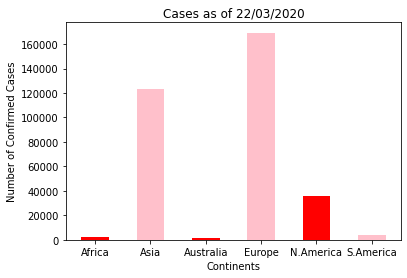

In [0]:
# x-coordinates of continents
x1 = sorted(list(set(continent_corr)))
  
# y-coordinates of number of cases
y1 = list(req2['3/22/20'])
  
# labels for bars 
tick_label =  ['Africa','Asia','Australia','Europe','N.America','S.America']
  
# plotting a bar chart 
plt.bar(x1, y1, tick_label = tick_label, width = 0.5, color = ['red', 'pink']) 
  
# naming the x-axis 
plt.xlabel('Continents') 
# naming the y-axis 
plt.ylabel('Number of Confirmed Cases') 
# plot title 
plt.title('Cases as of 22/03/2020') 
  
# function to show the plot 
plt.show()